 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale = pd.read_csv(Path("./Resources/whale_returns.csv"),index_col='Date',parse_dates=True, infer_datetime_format=True)

/var/folders/r7/7rpdw1hj7sdgwvppsd0vps6w0000gn/T/ipykernel_40522/3618302728.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale = pd.read_csv(Path("./Resources/whale_returns.csv"),index_col='Date',parse_dates=True, infer_datetime_format=True)


In [4]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [3]:
# Drop nulls
whale.dropna(inplace=True)
whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [4]:
# Reading algorithmic returns
algo = pd.read_csv(Path("./Resources/algo_returns.csv"),index_col='Date',parse_dates=True, infer_datetime_format=True)

/var/folders/r7/7rpdw1hj7sdgwvppsd0vps6w0000gn/T/ipykernel_40522/2081100266.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo = pd.read_csv(Path("./Resources/algo_returns.csv"),index_col='Date',parse_dates=True, infer_datetime_format=True)


In [7]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [5]:
# Drop nulls
algo.dropna(inplace=True)
algo

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [6]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv(Path("./Resources/sp500_history.csv"),index_col='Date',infer_datetime_format=True,parse_dates=True)

/var/folders/r7/7rpdw1hj7sdgwvppsd0vps6w0000gn/T/ipykernel_40522/798831656.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500 = pd.read_csv(Path("./Resources/sp500_history.csv"),index_col='Date',infer_datetime_format=True,parse_dates=True)
/var/folders/r7/7rpdw1hj7sdgwvppsd0vps6w0000gn/T/ipykernel_40522/798831656.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500 = pd.read_csv(Path("./Resources/sp500_history.csv"),index_col='Date',infer_datetime_format=True,parse_dates=True)


In [7]:
sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [8]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [9]:
sp500 = sp500.sort_values('Date',ascending=True)

In [10]:
sp500['Close'] = sp500['Close'].str.replace('$','')

In [11]:
sp500.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
sp500['Close'] = sp500['Close'].astype('float')

In [13]:
# Calculate Daily Returns
sp500 = sp500.pct_change()
sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
# sp500.dropna(inplace=True)
sp500 = sp500.dropna()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500 = sp500.rename(columns={'Close':'SP500'})
sp500.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_data = pd.concat([whale, algo, sp500['SP500']], axis=1, join="inner")
all_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

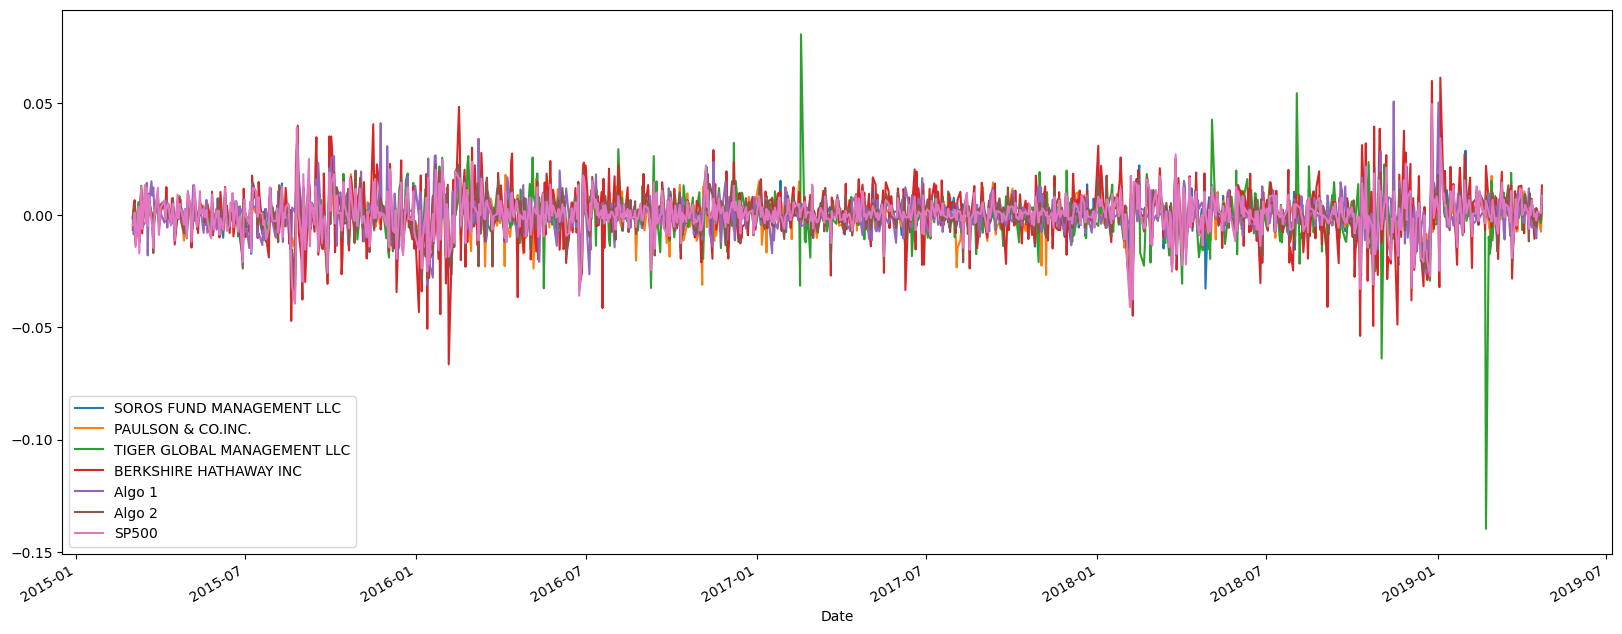

In [17]:
# Plot daily returns of all portfolios
all_data.plot(figsize = (20,8));


#### Calculate and Plot cumulative returns.

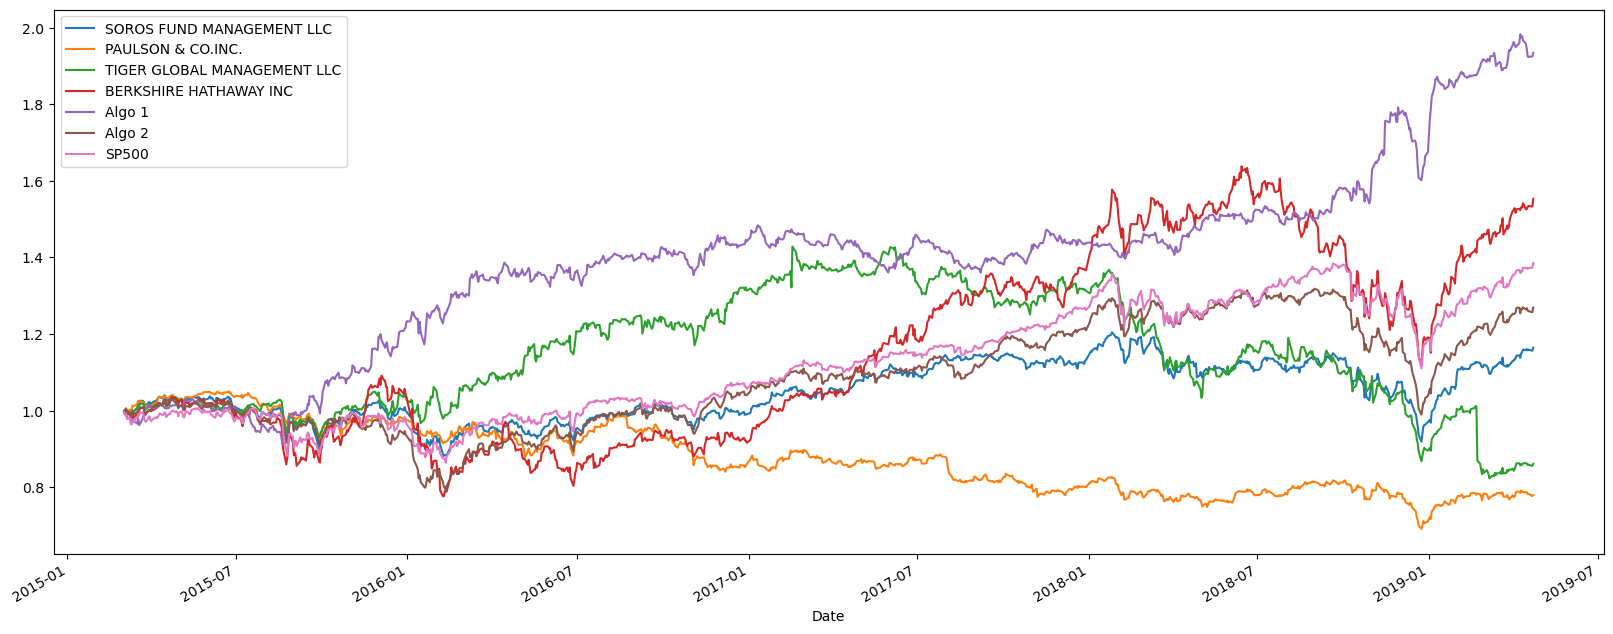

In [18]:
# Calculate cumulative returns of all portfolios
cum_ret = (1 + all_data).cumprod()

# Plot cumulative returns
cum_ret.plot(figsize=(20,8));

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [19]:
import matplotlib.pyplot as plt

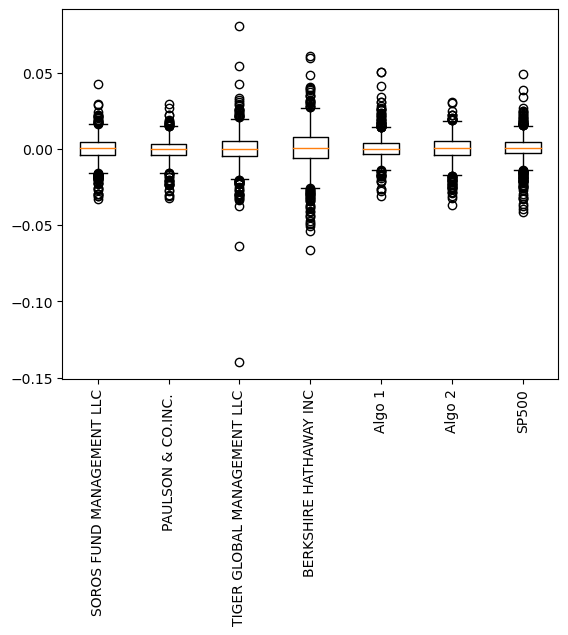

In [20]:
# Box plot to visually show risk = volatility -- > standard dev -- > daily returns
plt.boxplot(all_data,labels=list(all_data.columns))
plt.xticks(rotation = 90)
plt.show();

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
all_std = all_data.std()
all_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp_std = all_data['SP500'].std()
sp_std

0.008553731597758204

In [23]:
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = []
for i,x in all_std.items():
    if x > sp_std:
        riskier_portfolios.append({i:x})

In [24]:
riskier_portfolios

[{'TIGER GLOBAL MANAGEMENT LLC': 0.010893969618743005},
 {'BERKSHIRE HATHAWAY INC': 0.012918618441883491}]

In [25]:
all_std[all_std > sp_std]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_vol = all_data.std()*np.sqrt(252)
annual_vol

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

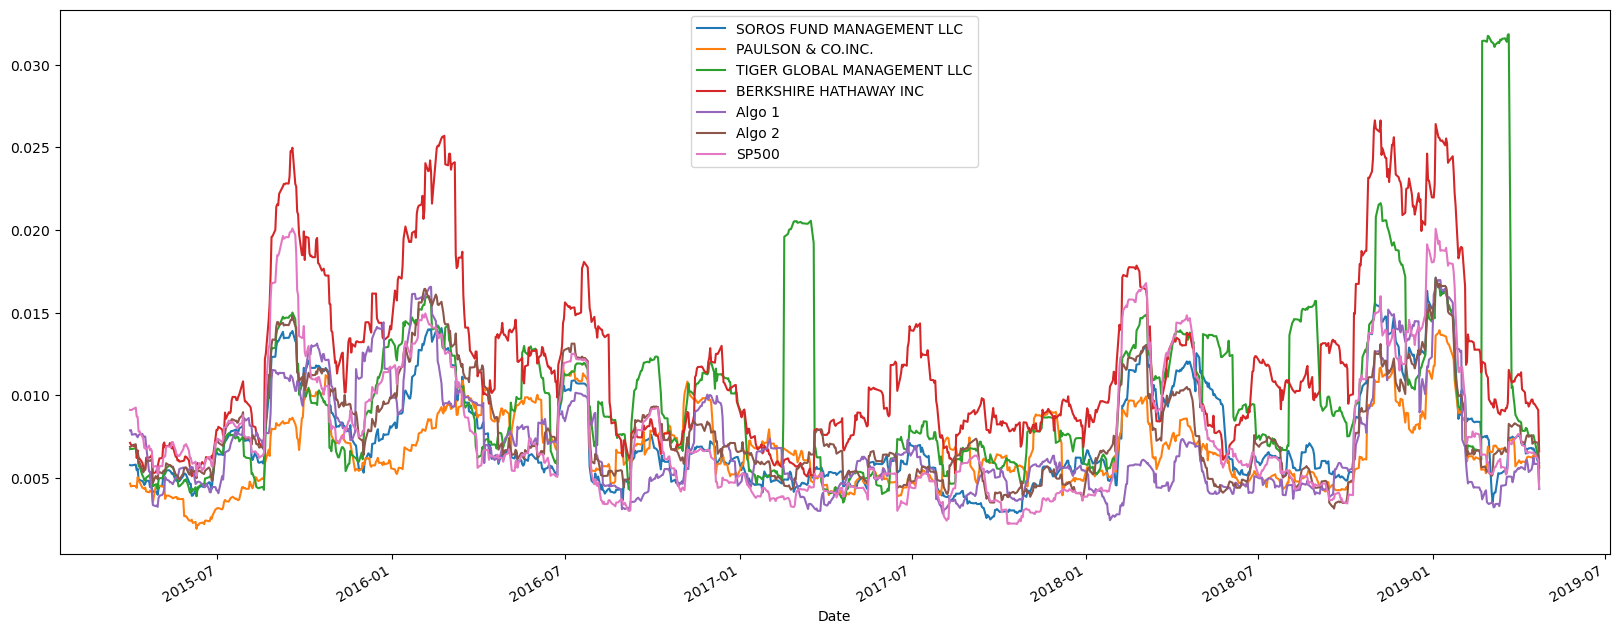

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_dev = all_data.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_dev.plot(figsize=(20,8));

### Calculate and plot the correlation

In [28]:
import seaborn as sns

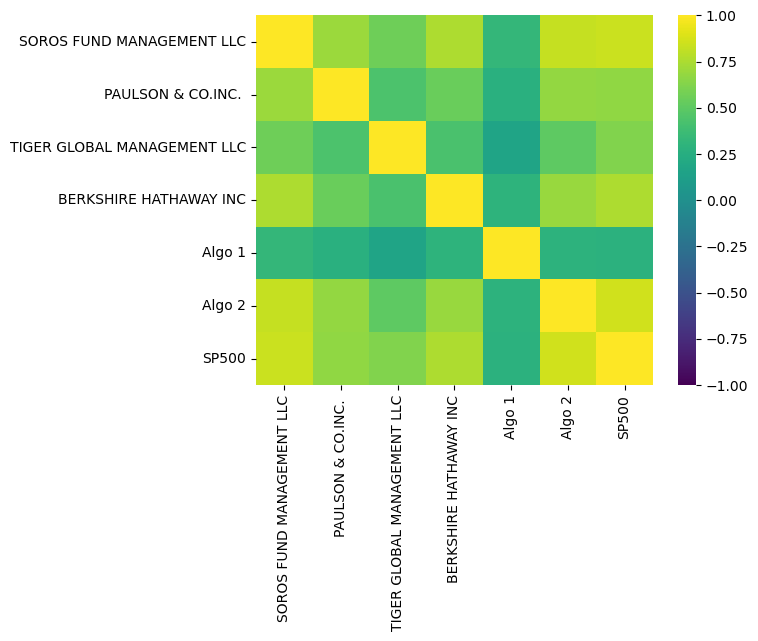

In [29]:
# Calculate the correlation -- > daily_returns
corr = all_data.corr()
# Display de correlation matrix
sns.heatmap(corr,cmap='viridis',vmin=-1,vmax=1)
plt.show();

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

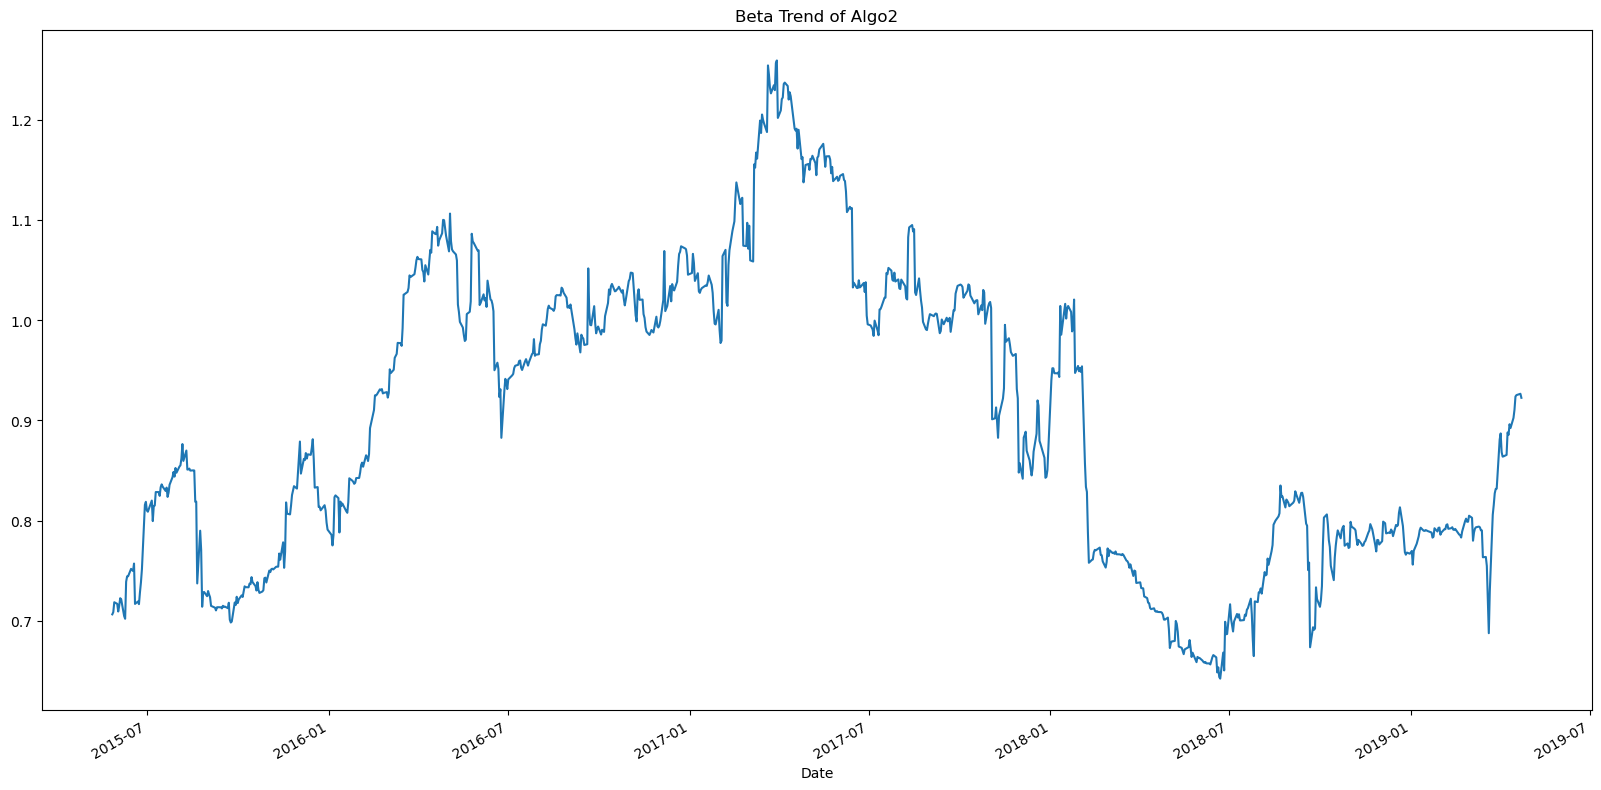

In [34]:
# Calculate covariance of a single portfolio
covariance = all_data['Algo 2'].rolling(window=60).cov(all_data['SP500'])

# Calculate variance of S&P 500
variance = all_data['SP500'].rolling(window=60).var()

# Computing beta
Algo2_beta = covariance / variance

# Plot beta trend
Algo2_beta.plot(title='Beta Trend of Algo2', figsize=(20,10));

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [35]:
# Use `ewm` to calculate the rolling window
all_std.ewm(halflife=21).mean()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007452
TIGER GLOBAL MANAGEMENT LLC    0.008637
BERKSHIRE HATHAWAY INC         0.009761
Algo 1                         0.009304
Algo 2                         0.009130
SP500                          0.009040
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_data.mean() * 252) / (all_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

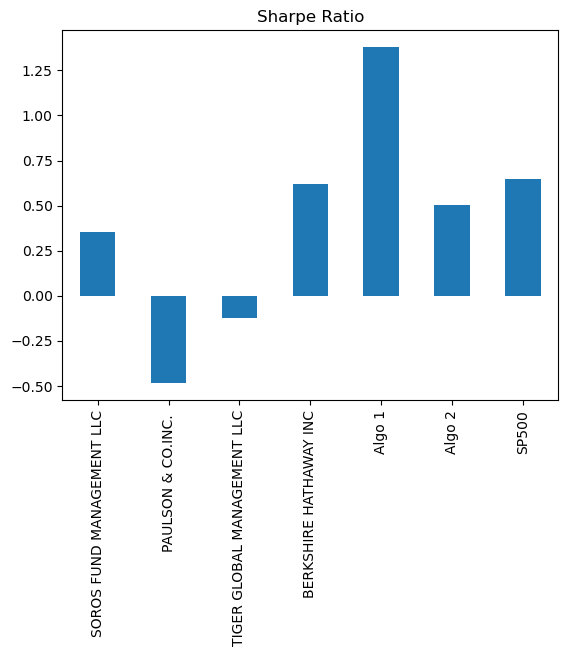

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both Algo's outperfomed the SP500 and some of the Whales Portfolios
Algo 1 on the other hand performed the best

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

### Apple, Google, Costco

In [98]:
# Reading data from 1st stock
aapl_path = Path("./Resources/aapl_historical.csv")


aapl = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True) 
aapl = aapl.drop(columns='Symbol')
aapl = aapl.rename(columns={"NOCP": "Close"})
aapl.head()

/var/folders/r7/7rpdw1hj7sdgwvppsd0vps6w0000gn/T/ipykernel_40522/1031190371.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,Close
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [95]:
# Reading data from 2nd stock
goog_path = Path("./Resources/goog_historical.csv")


goog = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)   
goog = goog.drop(columns='Symbol')
goog = goog.rename(columns={"NOCP": "Close"})
goog.head()

/var/folders/r7/7rpdw1hj7sdgwvppsd0vps6w0000gn/T/ipykernel_40522/1917952462.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,Close
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [96]:
# Reading data from 3rd stock
cost_path = Path("./Resources/cost.csv")


cost = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)   
cost = cost.drop(columns='Symbol')
cost = cost.rename(columns={"NOCP": "Close"})
cost.head()

/var/folders/r7/7rpdw1hj7sdgwvppsd0vps6w0000gn/T/ipykernel_40522/3090216394.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)


,Close
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [100]:
# Combine all stocks in a single DataFrame
portfolio = pd.concat([aapl, goog, cost], axis="columns", join="inner")
portfolio.head()

,Close,Close,Close
Trade DATE,,,
2019-05-09,200.72,1162.38,200.72
2019-05-08,202.90,1166.27,202.90
2019-05-07,202.86,1174.10,202.86
2019-05-06,208.48,1189.39,208.48
2019-05-03,211.75,1185.40,211.75


In [101]:
# Reset Date index
portfolio.reset_index()

,Trade DATE,Close,Close,Close
0,2019-05-09,200.72,1162.38,200.72
1,2019-05-08,202.90,1166.27,202.90
2,2019-05-07,202.86,1174.10,202.86
3,2019-05-06,208.48,1189.39,208.48
4,2019-05-03,211.75,1185.40,211.75
...,...,...,...,...
245,2018-05-17,186.99,1078.59,186.99
246,2018-05-16,188.18,1081.77,188.18
247,2018-05-15,186.44,1079.23,186.44
248,2018-05-14,188.15,1100.20,188.15


In [102]:
# Reorganize portfolio data by having a column per symbol
columns = ["AAPL", "GOOG", "COST"]
portfolio.columns = columns
portfolio.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,200.72
2019-05-08,202.90,1166.27,202.90
2019-05-07,202.86,1174.10,202.86
2019-05-06,208.48,1189.39,208.48
2019-05-03,211.75,1185.40,211.75


In [103]:
# Calculate daily returns
daily_returns = portfolio.pct_change()
daily_returns.head()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,0.010861
2019-05-07,-0.000197,0.006714,-0.000197
2019-05-06,0.027704,0.013023,0.027704
2019-05-03,0.015685,-0.003355,0.015685
2019-05-02,-0.012279,-0.019226,-0.012279


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [104]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted = daily_returns.dot(weights)
portfolio_weighted.sum()

# Display sample data
portfolio_weighted.head()

Trade DATE
2019-05-08    0.008356
2019-05-07    0.002106
2019-05-06    0.022810
2019-05-03    0.009338
2019-05-02   -0.014594
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [107]:
# Join your returns DataFrame to the original returns DataFrame
all_data["My Portfolio"]= portfolio_weighted
all_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [108]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_data.dropna(inplace=True)
all_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,0.000971
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.012591
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.006947
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.005225
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.006256


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [109]:
# Calculate the annualized `std`
annualized_std = all_data.std()*np.sqrt(252)
annualized_std.sort_values(ascending=False, inplace=True)
annualized_std

My Portfolio                   0.265816
BERKSHIRE HATHAWAY INC         0.246672
TIGER GLOBAL MANAGEMENT LLC    0.232069
SP500                          0.151739
SOROS FUND MANAGEMENT LLC      0.146455
Algo 2                         0.139262
Algo 1                         0.133423
PAULSON & CO.INC.              0.116489
dtype: float64

### Calculate and plot rolling `std` with 21-day window

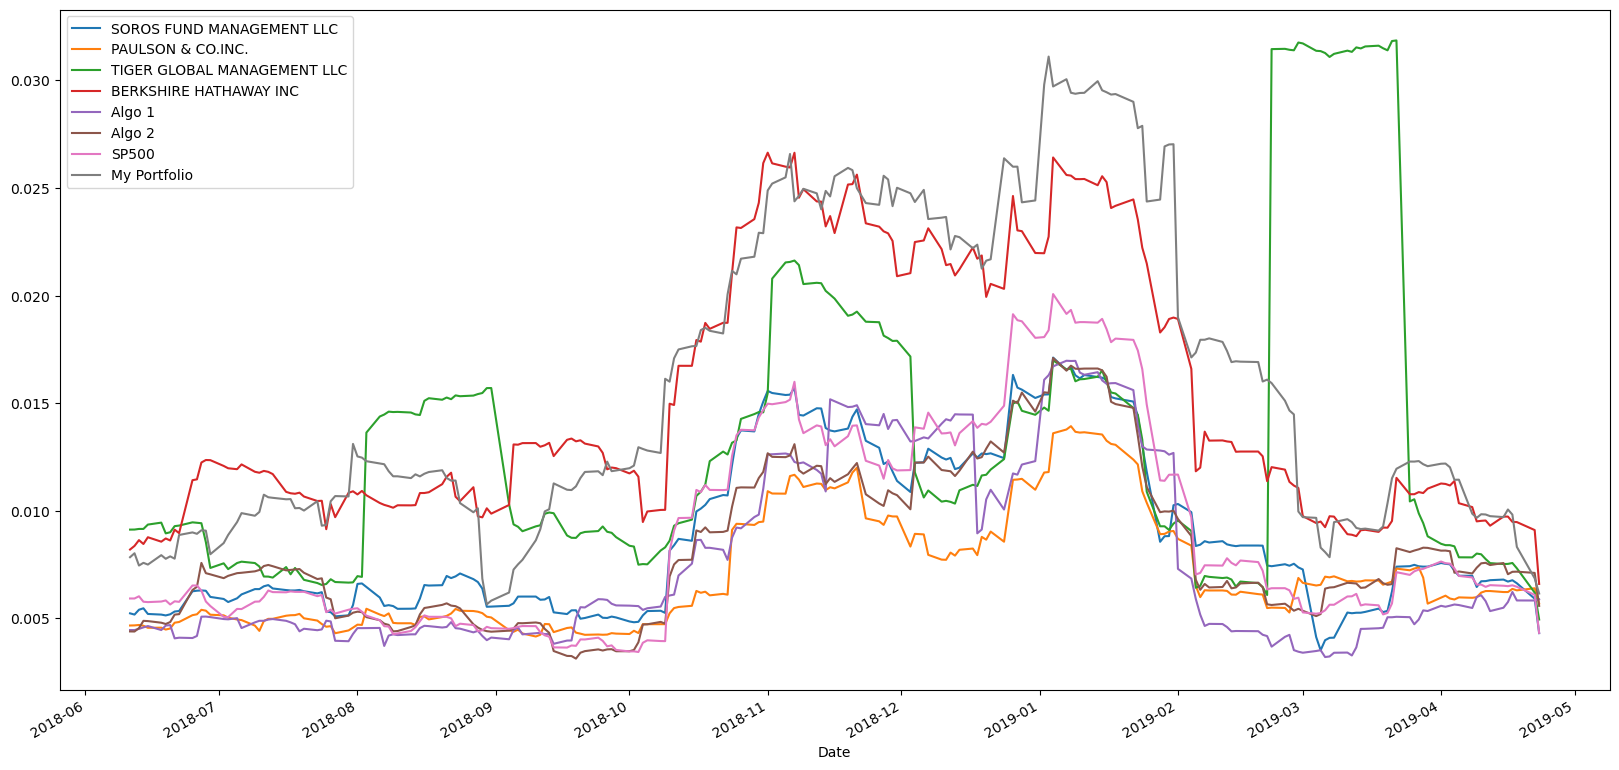

In [112]:
# Calculate rolling standard deviation
rolling_std = all_data.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize = (20,10));

### Calculate and plot the correlation

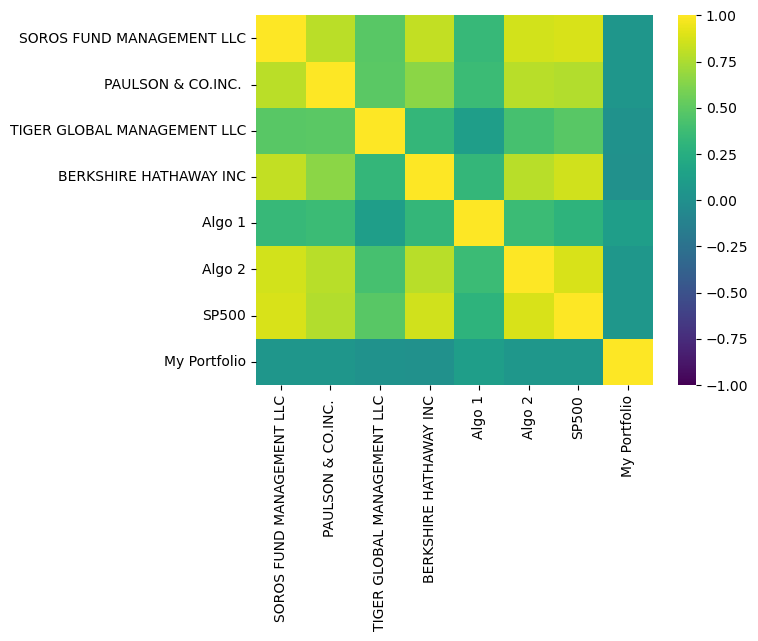

In [114]:
# Calculate and plot the correlation
portfolio_corr = all_data.corr()

sns.heatmap(portfolio_corr,cmap='viridis',vmin=-1,vmax=1)
plt.show();

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

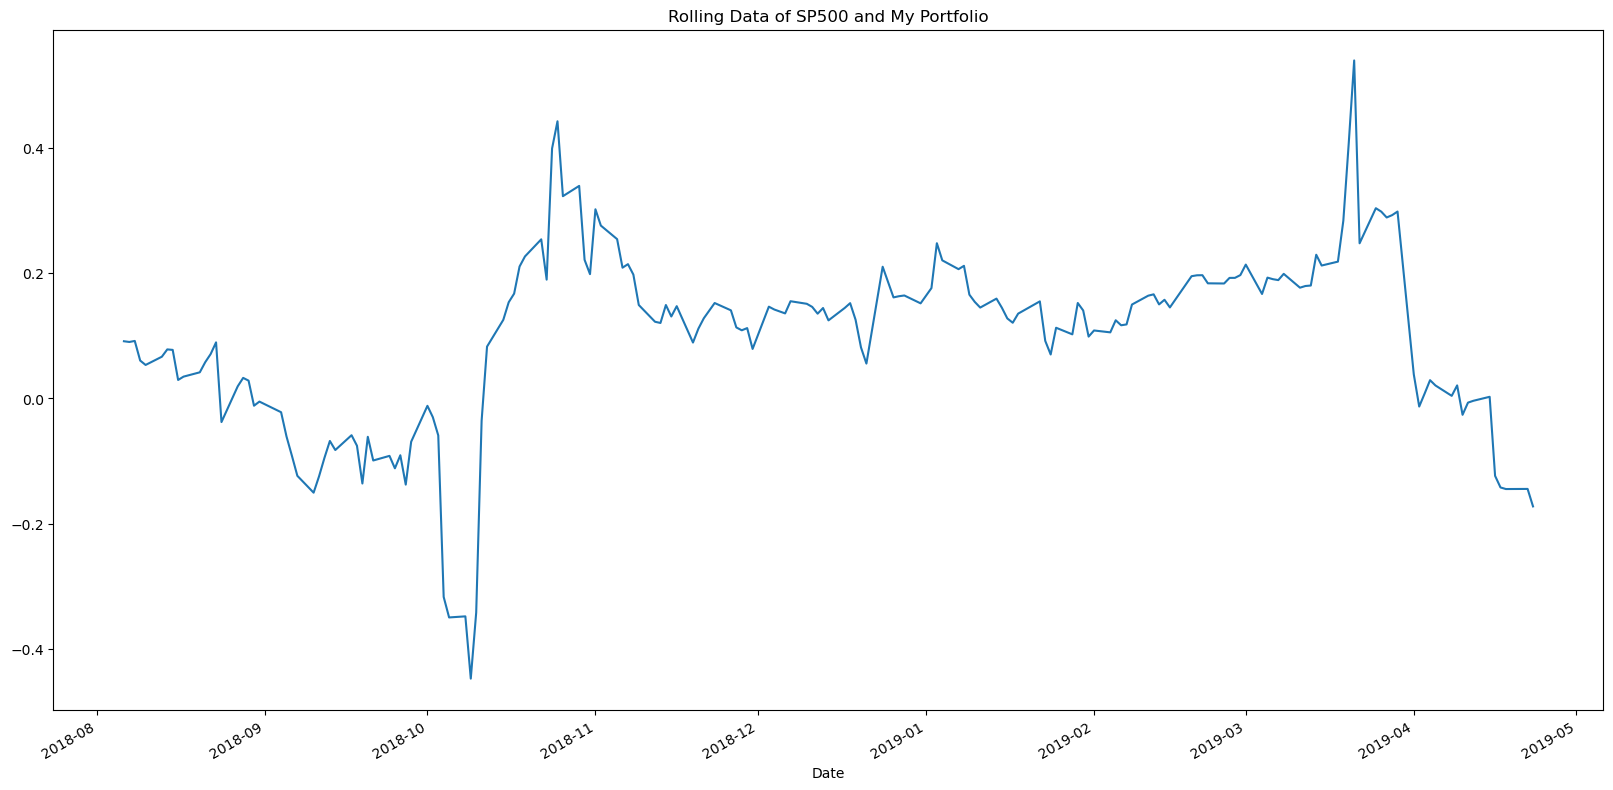

In [116]:
# Calculate and plot Beta

covariance2 = all_data['My Portfolio'].rolling(window=60).cov(all_data['SP500'])

variance2 = all_data['SP500'].rolling(window=60).var()

all_data_beta = covariance2 / variance2

all_data_beta.plot(title='Rolling Data of SP500 and My Portfolio', figsize=(20,10));

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [117]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_data.mean() * 252) / (all_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
SP500                          0.595486
My Portfolio                  -0.275503
dtype: float64

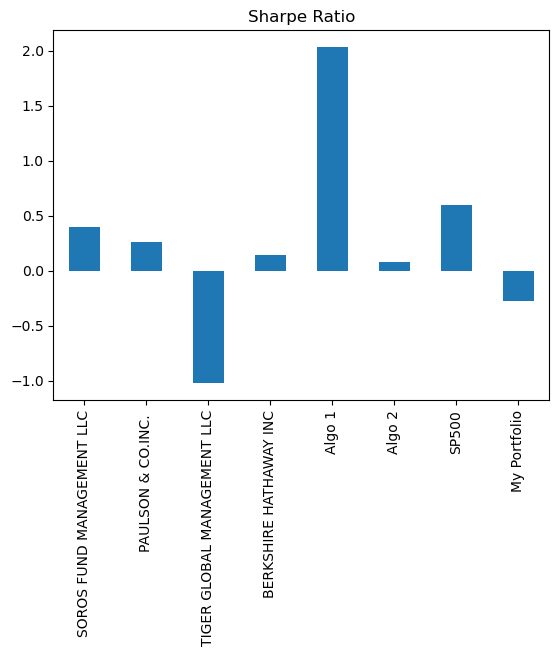

In [118]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio');

### How does your portfolio do?

My Portfolio does not do as well as majority of the portfolios. My portfolio was actually the second worst performing portfolio with Tiger Global doing the worst.